<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Стиль-заголовков" data-toc-modified-id="Стиль-заголовков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Стиль заголовков</a></span></li><li><span><a href="#Пропущенные-значения" data-toc-modified-id="Пропущенные-значения-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Пропущенные значения</a></span></li><li><span><a href="#Дубликаты" data-toc-modified-id="Дубликаты-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Дубликаты</a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Подготовка-датасета" data-toc-modified-id="Подготовка-датасета-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Подготовка датасета</a></span></li><li><span><a href="#Выборка" data-toc-modified-id="Выборка-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Выборка</a></span></li><li><span><a href="#Масштабирование-признаков" data-toc-modified-id="Масштабирование-признаков-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Масштабирование признаков</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Применение-моделей-машинного-обучения" data-toc-modified-id="Применение-моделей-машинного-обучения-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Применение моделей машинного обучения</a></span></li><li><span><a href="#Проверка-адекватности-моделей" data-toc-modified-id="Проверка-адекватности-моделей-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Проверка адекватности моделей</a></span></li><li><span><a href="#Матрица-ошибок,-recall,-precision-и-F1" data-toc-modified-id="Матрица-ошибок,-recall,-precision-и-F1-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Матрица ошибок, recall, precision и F1</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Увеличение-выборки-методом-&quot;upsample&quot;" data-toc-modified-id="Увеличение-выборки-методом-&quot;upsample&quot;-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Увеличение выборки методом "upsample"</a></span></li><li><span><a href="#Балансируем-данные-методом-class_weight='balanced" data-toc-modified-id="Балансируем-данные-методом-class_weight='balanced-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Балансируем данные методом class_weight='balanced</a></span></li><li><span><a href="#Проверка-адекватности-модели-&quot;Случайный-лес&quot;" data-toc-modified-id="Проверка-адекватности-модели-&quot;Случайный-лес&quot;-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Проверка адекватности модели "Случайный лес"</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Описание поекта "Отток клиентов"

Заказчиком данного исследования является банк "Бета-банк". 

**Цель исследования** - спрогнозировать вероятность оттока клиентов банка в ближайшее время с помощью обученной модели.Для достижения поставленной цели выполним следующие задачи: 

* изучим данные и рассмотрим их взаимосвязь
* разделим исходные данные на три выборки: обучающую, валидационную и тестовую 
* выберем лучшую модель по метрике f1 
* улучшим качество модели с помощью перебора гиперпараметров 
* проверим модель на тестовой выборке 
* проверим модель на адекватность 

**Ход исследования**

Для проведения исследования изучим 1 датасет, который содержит информацию о поведении клиентов и расторжении договоров с банком. 


## Загрузка данных

In [1]:
pip install phik

Note: you may need to restart the kernel to use updated packages.


In [2]:
# загружаем все необходимые библиотеки для исследования
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.utils import shuffle

import phik
from phik.report import plot_correlation_matrix
from phik import report

In [3]:
# загружаем данные 
df = pd.read_csv('D:/yandex_projects/supervised_learning/Churn.csv')

# посмотрим общую информацию о данных и выведем 5 строчек таблицы
df.info() 
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


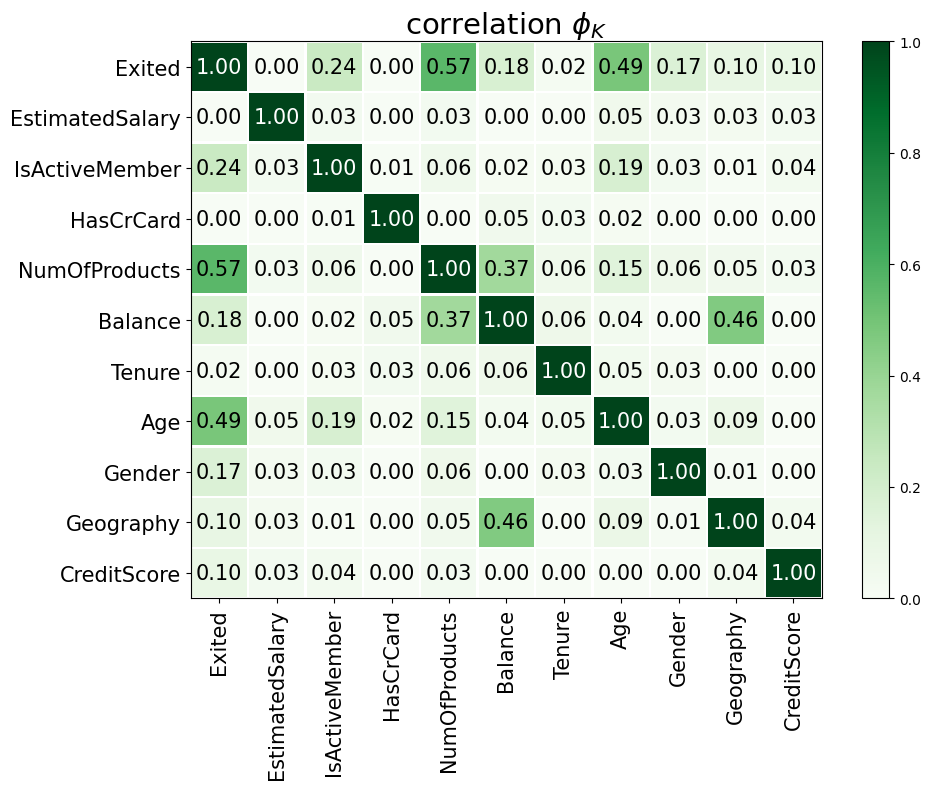

In [4]:
# создадим матрицу корреляции, используем матрицу phik, так как в датасете есть категориальные переменные

# подготовим отдельную таблицу, отбросив столбцы `RowNumber`, `CustomerId`, `Surname`
cols_to_keep = ['CreditScore', 'Geography','Gender', 'Age', 'Tenure', 
                'Balance', 'NumOfProducts', 'HasCrCard',
                'IsActiveMember', 'EstimatedSalary', 'Exited']
df_matrix = df[cols_to_keep]

# подготовим отдельно столбцы с интервальными данными 
interval_cols = ['CreditScore', 'Age', 'Tenure', 
                'Balance', 'NumOfProducts', 'EstimatedSalary']

# создадим матрицу
phik_overview = df_matrix.phik_matrix(interval_cols=interval_cols)

plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(10, 8))
# выводим матрицу
plt.tight_layout()

**Вывод**

Согласно документации в датасете содержится следующая информация:

* `RowNumber` — индекс строки в данных
* `CustomerId` — уникальный идентификатор клиента
* `Surname` — фамилия
* `CreditScore` — кредитный рейтинг
* `Geography` — страна проживания
* `Gender` — пол
* `Age` — возраст
* `Tenure` — сколько лет человек является клиентом банка
* `Balance` — баланс на счёте
* `NumOfProducts` — количество продуктов банка, используемых клиентом
* `HasCrCard` — наличие кредитной карты
* `IsActiveMember` — активность клиента
* `EstimatedSalary` — предполагаемая зарплата
* `Exited` — факт ухода клиента

Данные необходимо предобработать, так как видим, что есть пропуски в столбце `Tenure`, а также необходимо изменить стиль заголовков: сделать змеиный регистр и сделать буквы строчными. 

Нашей целью исследования является прогноз возможного оттока клиентов, в связи с этим возоможно получить только один из двух вариантов: клиент может либо продолжить пользоваться услугами банка, либо рассторгнуть договор с ним. Таким образом, в данном исследовании мы решаем задачу бинарной классификации. 

За целевой признак берем значения из столбца `Exited`. Остальные признаки понадобятся для предсказания решения по выбранному столбцу. 

По матрице корреляций видим, что значения некоторых признаков имеют значительно больше разброс, поэтому, возможно, некоторые признаки могут восприниматься моделью как более значимыми.

В данном исследовании мы применим три модели: "Дерево решений", "Случайный лес" и "Логистическая регрессия". Для того, чтобы модели сработали нам нужно преобразовать категориальные признаки в числовые техникой OHE.

## Предобработка данных

На данном этапе приступим к предобработке данных: заменим стиль заголовков, заменим пропуски и проверим наличие дубликатов. 

### Стиль заголовков 

In [5]:
# переменуем названия столбцов 
df = df.rename(columns={'RowNumber':'row_number', 'CustomerId': 'customer_id', 
                        'CreditScore': 'credit_score', 'NumOfProducts': 'num_of_products', 
                       'HasCrCard': 'has_cr_card', 'IsActiveMember': 'is_active_member', 
                        'EstimatedSalary':'estimated_salary'})

#сделаем названия колонок в нижнем регистре 
df.columns = df.columns.str.lower()

# проверим их новое название 
df.columns

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')

### Пропущенные значения 

In [6]:
# изучим пропуски 
df.isna().mean().sort_values(ascending=False)

tenure              0.0909
row_number          0.0000
customer_id         0.0000
surname             0.0000
credit_score        0.0000
geography           0.0000
gender              0.0000
age                 0.0000
balance             0.0000
num_of_products     0.0000
has_cr_card         0.0000
is_active_member    0.0000
estimated_salary    0.0000
exited              0.0000
dtype: float64

In [7]:
# сделаем срез по пропущенным значениям в столбце `Tenure`
df.query('tenure.isnull()', engine='python')

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,9986,15586914,Nepean,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


Пропущенные значения составляют 9% в данном столбце. Возможно, что в таблице появились пропущенные значения из-за человеческого фактора - не заполнянили количество лет, т.к. человек является клиентом банка не более года, но данную информацию проверить не можем, поэтому пропуски удалим во избажение искажения распределения. 

In [8]:
# удаляем пропущенные значения
df = df.dropna().reset_index(drop=True)

# проверяем, остались ли еще пропуски в столбце `tenure`
print('Количество пропусков:', df['tenure'].isna().sum())

Количество пропусков: 0


### Дубликаты 

На данном этапе проверим наличие явных и неявных дубликатов. 

Наличие явных дубликатов проверим по всему датасету, а неявных дубликатов проверим в следующих столбцах: `customer_id`, `geography`, `gender`. 

In [9]:
# проверим наличие явных дубликатов 
df.duplicated().sum()

0

Ниже проверим наличие неявных дубликатов 

In [10]:
# в столбце `customer_id`
print( df['customer_id'].duplicated().sum())

0


In [11]:
# в столбце `geography`
df['geography'].value_counts()

France     4550
Germany    2293
Spain      2248
Name: geography, dtype: int64

In [12]:
# в столбце `gender`
print(df['gender'].value_counts())

Male      4974
Female    4117
Name: gender, dtype: int64


**Вывод** 

Стили заголовок изменили на змеинный регистр и сделали все буквы строчными. 

Пропущенные значения в столбце `tenure` заменили на 0, предполагая, что пропуски возникли из-за человеческого фактора. 

В таблице не обнаружено явных и неявных дубликатов. 

## Подготовка данных

### Подготовка датасета 

Для дальнейшего исследования отбросим несколько столбцов, которые не понадобятся для обучения алгоритма и функцию pd.get_dummies для преобразования категориальных признаков в числовые. Перечисленные столбцы не потребуются в решении поставленной задачи, так как они нам неважны с точки зрения признаков, т.е. уход клиента не зависит от его id, имени или идентификационного номера. 

In [13]:
# создадим новый датасет и отбросим столбцы `row_number`, 'customer_id', 'surname'
churn = df.drop(['row_number', 'customer_id', 'surname'], axis=1)

churn.shape

(9091, 11)

В столбцах `gender` и `geography` содержатся категориальные признаки. Для того, чтобы обучить модель "Логистическая регрессия" преобразуем категориальные признаки в численные и во избежание фиктивных признаков отбросим первую колонку. 

In [14]:
# применим функцию get_dummies и добавим аргумент drop_first 
churn_dummies = pd.get_dummies(churn, drop_first=True)

# проверим размер таблицы 
churn_dummies.shape

(9091, 12)

После применения метода get_dummies в новом датафрейме мы получили 12 столбцов. Данное количество мы получили из-за того, что в столбце `gender` содержится 2 класса, а в столбце `geography` - 3 класса. Таким образом, мы получили 3 новых стоблца, что позволяет нам в дальнейшем избежать дамми-ловушки. 

### Выборка 

Выделяем целевой и остальные признаки в отдельные переменные и разобьем данные на три выборки: обучающую, валидационную и тестовую с соотношении 3/1/1.   

In [15]:
# выделяем целевой и остальные признаки в отдельные переменные `target` и `features`
features = churn_dummies.drop('exited', axis=1)
target = churn_dummies['exited']

#разбиваем датасет на три выборки 
train_test_features, valid_features, train_test_target, valid_target = train_test_split(
    features, target, test_size=0.2, random_state=12345)

train_features, test_features, train_target, test_target = train_test_split(
    train_test_features, train_test_target, test_size=0.25, random_state=12345)

print(f'Размер обучающей выборки: {train_features.shape}')
print(f'Размер валидационной выборки: {valid_features.shape}')
print(f'Размер тестовой выборки: {test_features.shape}')

Размер обучающей выборки: (5454, 11)
Размер валидационной выборки: (1819, 11)
Размер тестовой выборки: (1818, 11)


В результате разделения мы получили три выборки: 

* Обучающая выборка (train_features) - 60% 
* Валидационная выборка (valid_features) - 20% 
* Тестовая выборка (test_features) - 20% 

### Масштабирование признаков 

Значения в столбцах `credit_score`, `age`, `tenure`, `balance`, `num_of_products`, `estimated_salary`, разбросаны, поэтому чтобы при обучении модель в равной степени оценивала численные признаки, мы масштабируем их.  

In [16]:
# создаем список численных признаков 
numeric = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']

# создаем объект структуры StandardScaler и настраиваем на обучающих данных 
scaler = StandardScaler()
scaler.fit(train_features[numeric])

pd.options.mode.chained_assignment = None

In [17]:
# масштабируем числовые признаки обучающей выборки 
train_features[numeric] = scaler.transform(train_features[numeric])
train_features.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
3353,-0.203819,0.471273,0.352316,0.786022,0.782369,0,0,-0.357205,0,1,0
6176,-0.357513,-0.384930,-1.373506,-1.230577,0.782369,1,1,-1.671048,0,0,0
4020,0.175290,-0.289797,-0.683177,-1.230577,0.782369,1,0,-1.119181,0,0,1
535,0.349476,1.708010,0.007151,1.379462,-0.914942,0,0,-1.569064,1,0,0
1661,0.902771,-0.289797,1.387809,-1.230577,-0.914942,0,1,1.543790,0,0,1


In [18]:
# масштабируем числовые признаки валидационной выборки 
valid_features[numeric] = scaler.transform(valid_features[numeric])
valid_features.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
769,0.779816,0.185872,0.697480,0.600726,-0.914942,1,1,0.295405,0,0,1
8841,-1.218194,0.566406,-1.373506,-1.230577,-0.914942,0,1,1.578362,0,0,0
1548,0.595385,-0.384930,-0.683177,-0.319996,-0.914942,1,0,-1.417009,0,1,0
7842,0.831047,-0.670331,1.387809,0.820545,-0.914942,0,0,-0.672521,0,0,0
4796,-0.685391,-0.860599,-1.028342,-1.230577,0.782369,1,1,0.561255,0,0,1


In [19]:
# масштабируем числовые признаки тестовой выборки 
test_features[numeric] = scaler.transform(test_features[numeric])
test_features.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
4350,-1.003024,1.232342,-1.373506,-1.230577,-0.914942,0,0,-0.626048,0,0,1
357,-0.941546,-0.575198,-0.683177,-0.354876,-0.914942,1,1,-1.722595,0,0,1
4660,-1.679273,-1.336267,-0.683177,0.929889,-0.914942,1,1,0.235764,0,0,0
8837,-1.259179,-0.670331,0.697480,0.786457,-0.914942,0,0,-0.223572,0,0,1
1805,-0.162835,0.376139,-0.683177,1.085690,-0.914942,1,1,1.022964,1,0,1


**Вывод**

Мы подготовили датасет для обучения:  

* отбросили столбцы, такие как: `row_number`, `customer_id`, `surname`, так как для обучения модели они нам не потребуются. 

* Мы выделили переменные для целевого и остальных признаков и разделили данные на три выборки с соотношением 60/20/20. 
Данные из обучающией выборки, `train_features` (60%), будем использовать для обучения модели. Валидация будет осуществляться на данных из валидационной выборки, `valid_features` (20%), а проверка качества модели - на данных из тестовой выборки, `test_features`(20%). 

* Масштабировали признаки для всех трех выборок. 


## Исследование задачи

### Применение моделей машинного обучения

На данном этапе применим несколько моделей и рассчитаем долю правильных ответов: 

* Дерево решений 
* Случайный лес
* Логистическая регрессия 

Проверим адекватность моделей и посчитаем несколько метрик для каждой модели. 

In [20]:
# рассчитаем точность и f1 каждой модели 

# модель "Дерево решений"

best_model_tree = None 
best_depth_tree = 0
best_f1_tree = 0 
best_min_samples_leaf_tree = 0

for leaf in range(1, 60, 1):
    for depth in range(1, 20, 1): 
        model_tree = DecisionTreeClassifier(random_state = 12345, max_depth=depth, min_samples_leaf=leaf)
        predictions_tree = model_tree.fit(train_features, train_target).predict(valid_features)
        f1 = f1_score(valid_target, predictions_tree)
        if f1 > best_f1_tree: 
            best_model_tree = model_tree
            best_f1_tree = f1 
            best_depth_tree = depth 
            best_min_samples_leaf_tree = leaf
        
print(f''' 
Лучший результат f1: {best_f1_tree} 
Лучшая глубина: {best_depth_tree}
Минимальное число объектов листьев: {best_min_samples_leaf_tree}
Значение Accuracy: {accuracy_score(valid_target, model_tree.fit(train_features, train_target).predict(valid_features))}
''')

 
Лучший результат f1: 0.5963302752293578 
Лучшая глубина: 8
Минимальное число объектов листьев: 34
Значение Accuracy: 0.8521165475536009



In [21]:
# Случайный лес 

best_model_forest = None 
best_depth_forest = 0
best_est = 0
best_f1_forest = 0 

for depth in range(1, 16, 1):
    for est in range(60, 201, 10): 
        model_forest = RandomForestClassifier(random_state=12345, max_depth=depth, n_estimators=est)
        predictions_forest = model_forest.fit(train_features, train_target).predict(valid_features)
        f1 = f1_score(valid_target, predictions_forest) 
        if f1 > best_f1_forest: 
            best_model_forest = model_forest
            best_f1_forest = f1 
            best_depth_forest = depth
            best_est = est
        
print(f'''
Лучший результат f1: {best_f1_forest} 
Лучшая глубина: {best_depth_forest} 
Лучшее количество деревьев: {best_est}
Значение Accuracy: {accuracy_score(valid_target, model_forest.fit(train_features, train_target).predict(valid_features))}
''')


Лучший результат f1: 0.5588752196836555 
Лучшая глубина: 10 
Лучшее количество деревьев: 160
Значение Accuracy: 0.8587135788894997



In [22]:
# Проверим модель "Логистическая регрессия" с алгоритмом liblinear
model_log_lib = LogisticRegression(solver='liblinear', max_iter=1000, random_state=12345)
predictions_log_lib = model_log_lib.fit(train_features, train_target).predict(valid_features)

# напечатаем результат 
f1_score_log_lib = f1_score(valid_target, predictions_log_lib)
print(f'Значение f1: {f1_score_log_lib}')
accuracy_log_lib = accuracy_score(valid_target, predictions_log_lib)
print(f'Значение Accuracy "Логистической регрессии": {accuracy_log_lib}')

Значение f1: 0.329938900203666
Значение Accuracy "Логистической регрессии": 0.8191313908741067


Создадим собственную функцию для построения графика Roc-кривой и расчета метрики AUC-ROC 

In [23]:
# сделаем расчет вероятности для построения кривой ROC 

def roc_auc(model, features, target):
    probabilities_valid = model.predict_proba(features)
    probabilities_one_valid = probabilities_valid[:, 1] 
    fpr, tpr, thresholds = roc_curve(target, probabilities_one_valid)
    
    # строим график ROC-кривой
    plt.figure(figsize=(6,6))
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.ylim([0.0, 1.0])
    plt.xlim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривая')
    plt.show()
    
    # рассчитаем AUC-ROC
    auc_roc = roc_auc_score(target, probabilities_one_valid, average=None)
    
    return auc_roc

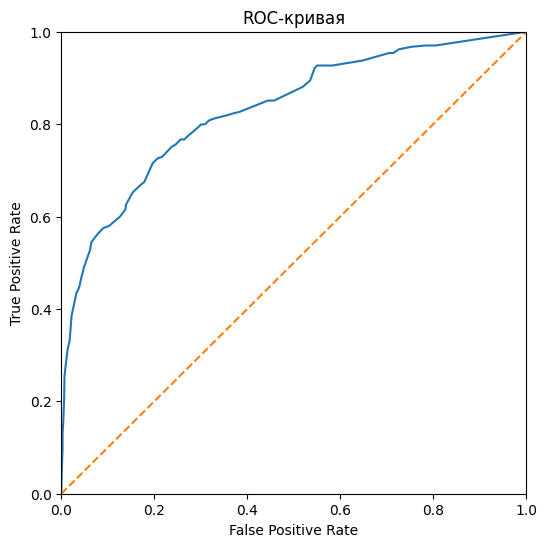

0.8305083637043266


In [24]:
# график ROC-кривой и значение ROC-AUC модели "Дерево решений"
print(roc_auc(best_model_tree, valid_features, valid_target))

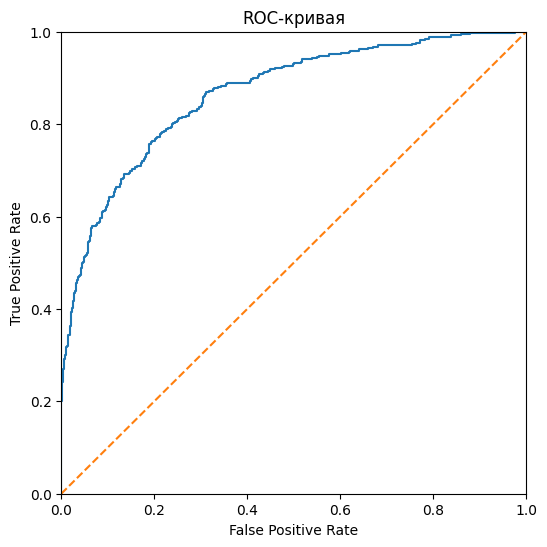

0.865175217269414


In [25]:
# график ROC-кривой и значение ROC-AUC модели "Случайный лес"
print(roc_auc(best_model_forest, valid_features, valid_target))

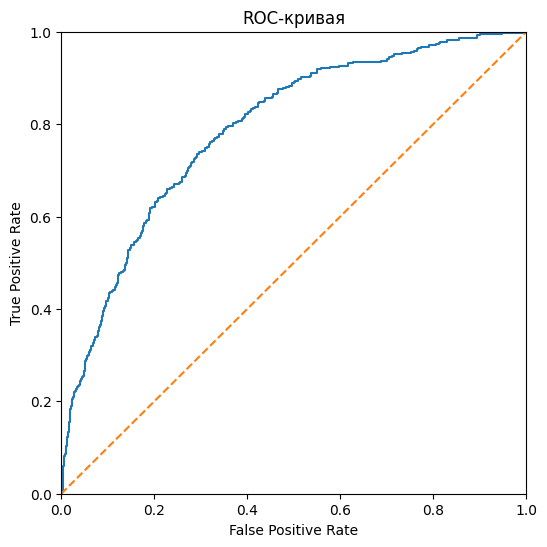

0.7882347444164097


In [26]:
# график ROC-кривой и значение ROC-AUC модели "Логистическая регрессия"
print(roc_auc(model_log_lib, valid_features, valid_target))

**Вывод** 

Наибольший результат метрики "AUC-ROC" у модели "Случайный лес", но наилучший результат метрики f1 показала модель "Дерево решений". 

На следующем этапе проверим каждую модель на адекватность. 

### Проверка адекватности моделей 

0    0.796062
1    0.203938
Name: exited, dtype: float64


<AxesSubplot:>

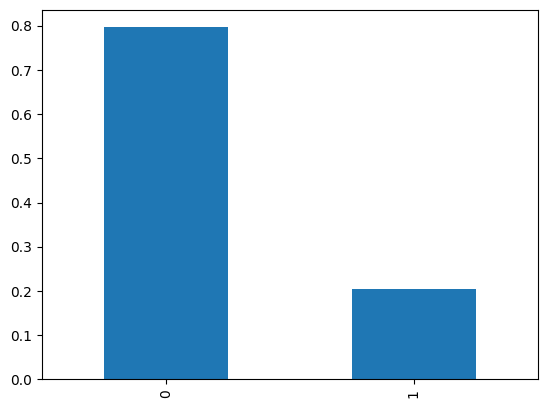

In [27]:
# проверим баланс классов выборки 
class_frequency = churn_dummies['exited'].value_counts(normalize=True)

print(class_frequency)
class_frequency.plot(kind='bar')

По графику видим, что целевой признак показывает ориентировочно 80% отрицательных и только 20% положительных ответов. Таким образом, можем утверждать, что в данных наблюдается дисбаланс. 

In [28]:
# также рассчитаем частоты классов каждой модели 

print('Частота класса')

# Дерево решений
freq_valid_tree = pd.Series(best_model_tree.predict(valid_features)).value_counts(normalize=True)
print(f'''
Дерево решений: 
{freq_valid_tree}
''')

# Случайный лес
freq_valid_forest = pd.Series(best_model_forest.predict(valid_features)).value_counts(normalize=True)
print(f'''
Случайный лес: 
{freq_valid_forest}
''')

# Логистическая регрессия
freq_valid_log = pd.Series(model_log_lib.predict(valid_features)).value_counts(normalize=True)
print(f'''
Логистическая регрессия: 
{freq_valid_log}''')

Частота класса

Дерево решений: 
0    0.843321
1    0.156679
dtype: float64


Случайный лес: 
0    0.890049
1    0.109951
dtype: float64


Логистическая регрессия: 
0    0.93293
1    0.06707
dtype: float64


Исходя из полученных данных видим, что модель "Логистическая регрессия" склонна показывать результат, равный 0, а самое высокое значение accuracy у модели "Случайный лес". 

Сравним результаты выбранных моделей с константной моделью. За константу пример значение 0. 

In [29]:
# создаем константную модель для проверки адекватности 
target_pred_constant = pd.Series(0, index=valid_target.index)
print(accuracy_score(valid_target, target_pred_constant))

0.7971412864211105


**Вывод** 

Напомним, что точность каждой модели соствляет: 

* Точность модели "Дерево решений" ~ 0.79
* Точность модели "Случайного леса" ~ 0.86
* Точность модели "Логистической регрессии" ~ 0.82

Точность константной модели незначительно отличается от обученных,а это также говорит нам о проблеме дисбаланса классов в данных.    

Для дальнейшего исследования проблемы дисбаланса классов изучим матрицу ошибок. 

### Матрица ошибок, recall, precision и F1

In [30]:
# матрица ошибок "Дерево решений"
confusion_matrix(valid_target, best_model_tree.predict(valid_features))

array([[1360,   90],
       [ 174,  195]], dtype=int64)

In [31]:
# матрица ошибок "Случайный лес"
confusion_matrix(valid_target, best_model_forest.predict(valid_features))

array([[1409,   41],
       [ 210,  159]], dtype=int64)

In [32]:
# матрица ошибок "Логистическая регрессия"
confusion_matrix(valid_target, model_log_lib.predict(valid_features))

array([[1409,   41],
       [ 288,   81]], dtype=int64)

Модели склонны предсказывать отрицательный результат. 


Изучим метрики полноты, точности и F1 для каждой модели. 

In [33]:
# создадим собственную функцию для подсчета полноты, точности и F1 
def recall_precision_f1 (target_valid, predictions): 
    print(f'Полнота: {recall_score(target_valid, predictions)}')
    print(f'Точность: {precision_score(target_valid, predictions)}')
    print(f'f1: {f1_score(target_valid, predictions)}')

In [34]:
# подсчет точности, полноты и F1 для модели "Дерево решений"
recall_precision_f1(valid_target, best_model_tree.predict(valid_features))

Полнота: 0.5284552845528455
Точность: 0.6842105263157895
f1: 0.5963302752293578


In [35]:
# подсчет точности, полноты и F1 для модели "Случайный лес"
recall_precision_f1(valid_target, best_model_forest.predict(valid_features))

Полнота: 0.43089430894308944
Точность: 0.795
f1: 0.5588752196836555


In [36]:
# подсчет точности, полноты и F1 для модели "Логистическая регрессия"
recall_precision_f1(valid_target, model_log_lib.predict(valid_features))

Полнота: 0.21951219512195122
Точность: 0.6639344262295082
f1: 0.329938900203666


**Вывод**

Исходя из полученных данных видим, что модели чаще предсказывают отрицательный результат. 

Самую высокую точность показала модель Логистической регрессии, далее Случайный лес и Дерево решений. Это также означает, что модели стремятся с большой вероятностью выдавать результат 0. 

Предполагаем,что это также вызвано дисбалансом классов и попробуем устранить данную проблему. 

## Борьба с дисбалансом

### Увеличение выборки методом "upsample"

In [37]:
# увеличим выборку методом upsample 

def upsample(features, target, repeat): 
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(train_features, train_target, 4) 

1    0.508001
0    0.491999
Name: exited, dtype: float64


<AxesSubplot:>

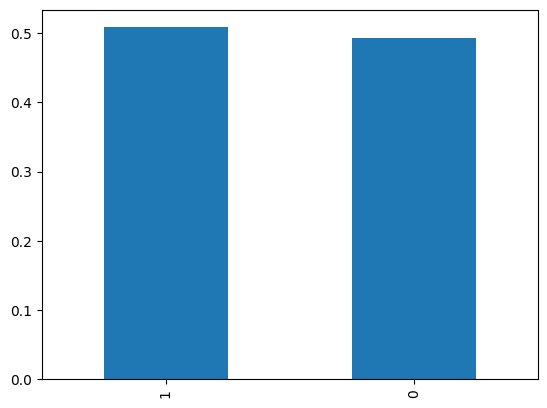

In [38]:
# проверим баланс классов выборки после применения метода upsample 
class_frequency_upsampled = target_upsampled.value_counts(normalize=True)

print(class_frequency_upsampled)
class_frequency_upsampled.plot(kind='bar')

Обучение моделей на новой выборке без дисбаланса


Лучший результат f1: 0.5783132530120483 
Лучшая глубина: 6
Минимальное количество листьев: 34



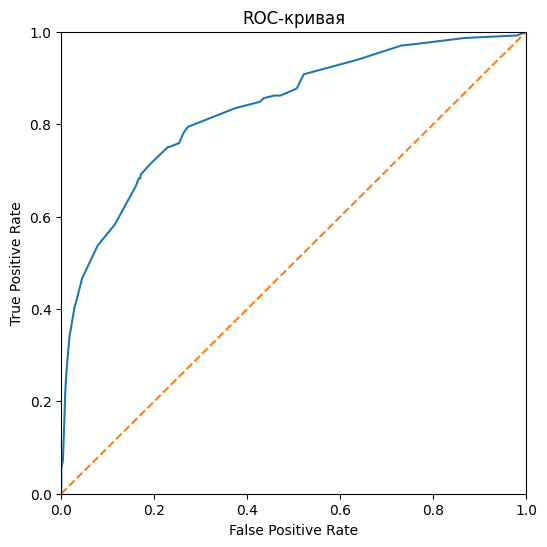

0.8330520512101673


In [39]:
# Дерево решений с нарощенной выборкой

best_model_tree = None 
best_depth_tree = 0
best_f1_tree = 0 
best_min_samples_leaf_tree = 0

for leaf in range(1, 60, 1):
    for depth in range(1, 20, 1): 
        model_tree = DecisionTreeClassifier(random_state=12345, max_depth=depth, min_samples_leaf=leaf)
        predictions_tree = model_tree.fit(features_upsampled, target_upsampled).predict(valid_features)
        f1 = f1_score(valid_target, predictions_tree)
        if f1 > best_f1_tree: 
            best_model_tree = model_tree
            best_f1_tree = f1 
            best_depth_tree = depth 
            best_min_samples_leaf_tree = leaf
        
print(f'''
Лучший результат f1: {best_f1_tree} 
Лучшая глубина: {best_depth_tree}
Минимальное количество листьев: {best_min_samples_leaf_tree}
''')
print(roc_auc(best_model_tree, valid_features, valid_target))


Лучший результат f1: 0.6171428571428572 
Лучшая глубина: 7 
Лучшее количество деревьев: 10



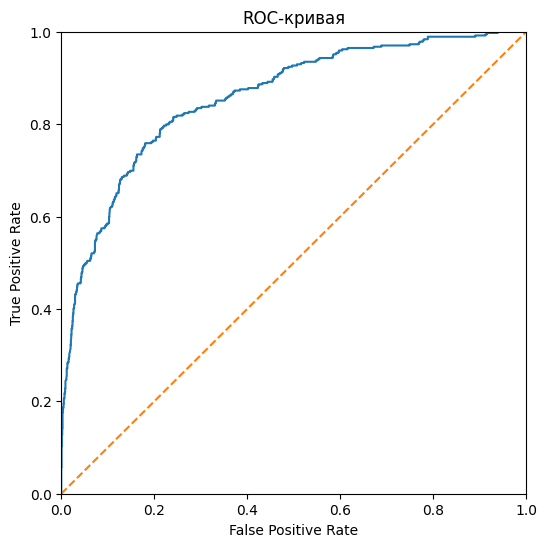

0.8578889823380993


In [40]:
# Случайный лес с нарощенной выборкой
best_model_forest = None 
best_depth_forest = 0
best_est = 0
best_f1_forest = 0 

for depth in range(1, 16, 1):
    for est in range(10, 201, 10): 
        model_forest = RandomForestClassifier(random_state=12345, max_depth=depth, n_estimators=est)
        predictions_forest = model_forest.fit(features_upsampled, target_upsampled).predict(valid_features)
        f1 = f1_score(valid_target, predictions_forest) 
        if f1 > best_f1_forest: 
            best_model_forest = model_forest
            best_f1_forest = f1 
            best_depth_forest = depth
            best_est = est
        
print(f'''
Лучший результат f1: {best_f1_forest} 
Лучшая глубина: {best_depth_forest} 
Лучшее количество деревьев: {best_est}
''')
print(roc_auc(best_model_forest, valid_features, valid_target))

Лучший результат f1: 0.5085714285714286


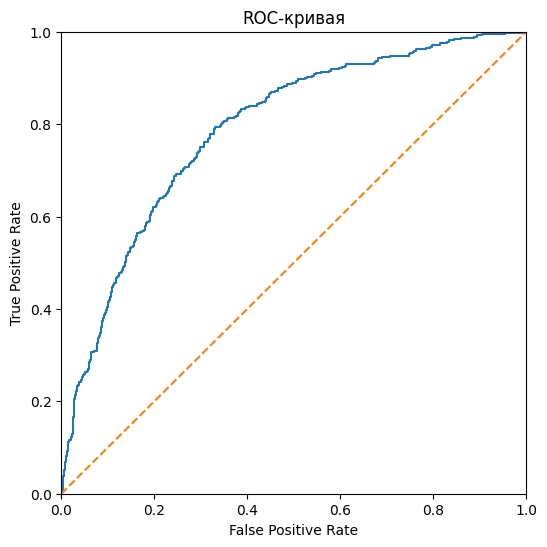

0.7880927016166713


In [41]:
# Логистическая регрессия с нарощенной выборкой
model_log = LogisticRegression(solver='liblinear')
predictions_log = model_log.fit(features_upsampled, target_upsampled).predict(valid_features)
print(f'Лучший результат f1: {f1_score(valid_target, predictions_log)}')
print(roc_auc(model_log, valid_features, valid_target))

### Балансируем данные методом class_weight='balanced

Обучение моделей на изначальной тренировочной выборке с изменением гиперпараметра class_weight='balanced'


Лучший результат f1: 0.5782092772384034 
Лучшая глубина: 6
Минимальное количество листьев: 16



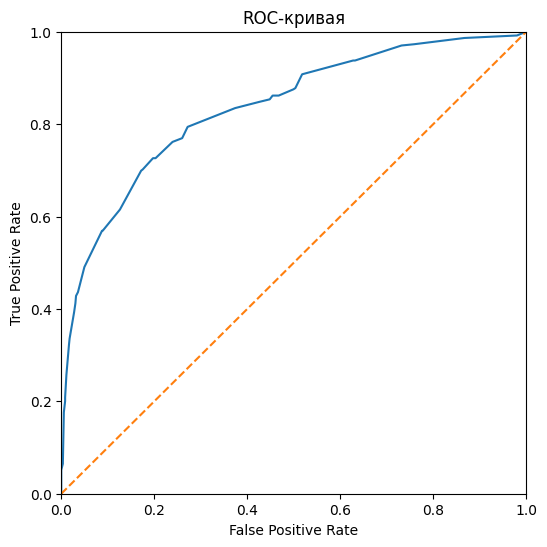

0.8354807961872722


In [42]:
# Дерево решений с class_weight='balanced'

best_model_tree = None 
best_depth_tree = 0
best_f1_tree = 0 
best_min_samples_leaf_tree = 0

for leaf in range(1, 60, 1):
    for depth in range(1, 16, 1): 
        model_tree = DecisionTreeClassifier(random_state = 12345, max_depth=depth, 
                                            min_samples_leaf=leaf, class_weight='balanced')
        predictions_tree = model_tree.fit(train_features, train_target).predict(valid_features)
        f1 = f1_score(valid_target, predictions_tree)
        if f1 > best_f1_tree: 
            best_model_tree = model_tree
            best_f1_tree = f1 
            best_depth_tree = depth 
            best_min_samples_leaf_tree = leaf
        
print(f'''
Лучший результат f1: {best_f1_tree} 
Лучшая глубина: {best_depth_tree}
Минимальное количество листьев: {best_min_samples_leaf_tree}
''')
print(roc_auc(best_model_tree, valid_features, valid_target))


Лучший результат f1: 0.6151603498542274
Лучшая глубина: 11
Лучшее количество деревьев: 150



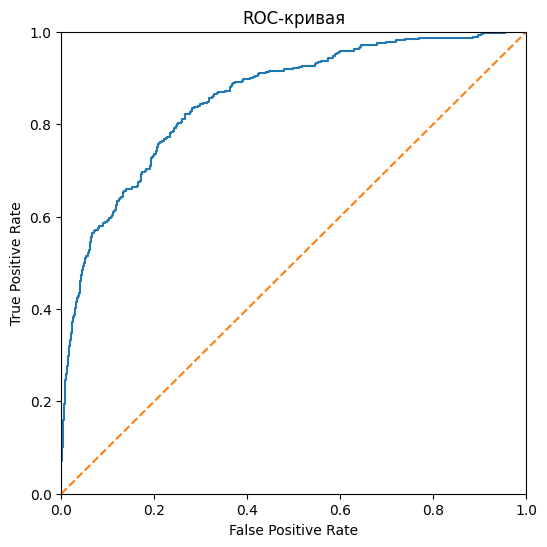

0.8563423979067376


In [43]:
# Случайный лес с class_weight='balanced'
best_model_forest_balanced = None 
best_depth_forest = 0
best_est = 0
best_f1_forest = 0 

for depth in range(1, 16, 1):
    for est in range(10, 201, 10): 
        model_forest = RandomForestClassifier(random_state=12345, max_depth=depth, n_estimators=est, class_weight='balanced')
        predictions_forest = model_forest.fit(train_features, train_target).predict(valid_features)
        f1 = f1_score(valid_target, predictions_forest) 
        if f1 > best_f1_forest: 
            best_model_forest_balanced = model_forest
            best_f1_forest = f1 
            best_depth_forest = depth
            best_est = est
        
print(f'''
Лучший результат f1: {best_f1_forest}
Лучшая глубина: {best_depth_forest}
Лучшее количество деревьев: {best_est}
''')
print(roc_auc(best_model_forest_balanced, valid_features, valid_target))

Лучший результат f1: 0.5092322643343051


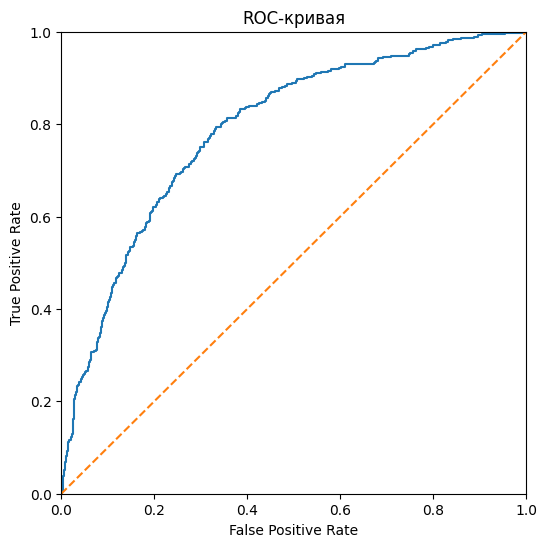

0.7880870946640501


In [44]:
# Логистическая регрессия с class_weight='balanced'
model_log = LogisticRegression(solver='liblinear', class_weight='balanced')
predictions_log = model_log.fit(train_features, train_target).predict(valid_features)
print(f'Лучший результат f1: {f1_score(valid_target, predictions_log)}')
print(roc_auc(model_log, valid_features, valid_target))

Показатели всех моделей улучшились после балансировки классов. 

Балансировка весов классов дала наилучший результат у модели "Дерево решений" в сравнении с методом upsample, но лучшие показатели у модели "Случайный лес" при увеличении выборки методом upsample. 

Таким образом, для дальнейшего исследования берем модель "Случайный лес" и применим к ней данные, полученные в результате метода upsample, так как она показала наилучшие результаты без перебора гиперпараметров. 

### Проверка адекватности модели "Случайный лес"

In [45]:
# сравним показатели точности  
print(f'Accuracy константной модели: {accuracy_score(valid_target, target_pred_constant)}')
print(f'Accuracy модели "Случайный лес": {accuracy_score(valid_target, best_model_forest.predict(valid_features))}')

Accuracy константной модели: 0.7971412864211105
Accuracy модели "Случайный лес": 0.8158328752061572


**Вывод** 

Наилучший результат метрики F1, равной ~0.62, модель показала при следующих гиперпараметрах: 

* Глубина дерева - 7 
* Количество деревьев - 10 

Модель "Случайный лес" показала результат по метрике "accuracy" лучше, чем у константной модели, а значит ее можно считать адекватной. 

## Тестирование модели

In [46]:
# обучим модель с выбранными наилучшими параметрами и применим ее на тестовой выборке
model_forest_final = RandomForestClassifier(random_state=12345, n_estimators=10, max_depth=7)
predictions_forest_final = model_forest_final.fit(features_upsampled, target_upsampled).predict(test_features)

In [47]:
# сделаем расчет точности, полноты и F1 для модели "Случайный лес"
recall_precision_f1(test_target, predictions_forest_final)
# посчитаем также accuracy 
print(f'Accuracy: {accuracy_score(test_target, predictions_forest_final)}')

Полнота: 0.6994535519125683
Точность: 0.5140562248995983
f1: 0.5925925925925924
Accuracy: 0.8063806380638063


Метрика AUC-ROC 

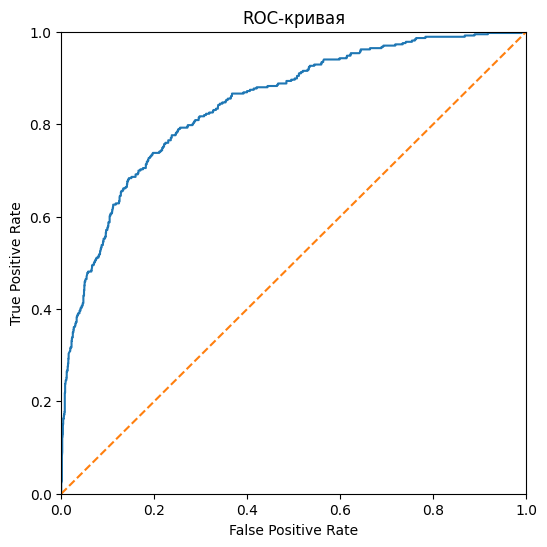

AUC-ROC: 0.8444156543076067


In [48]:
# сделаем расчет вероятности для построения кривой ROC 
probabilities_valid = model_forest_final.predict_proba(test_features)
probabilities_one_valid = probabilities_valid[:, 1] 

fpr, tpr, thresholds = roc_curve(test_target, probabilities_one_valid)

# строим график ROC-кривой
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

# рассчитаем AUC-ROC
auc_roc = roc_auc_score(test_target, probabilities_one_valid, average=None)

print(f'AUC-ROC: {auc_roc}')

## Вывод

В данной работе были применены модели "Дерево решений", "Случайный лес" и "Логистическая регрессия". 

Перед исследованием и применением моделей были почищены данные: избавились от пропущенных значений и проверили данные на наличие дубликатов, а также преобразовали категориальные переменные в числовые и применили масштабирование.  

При применении моделей в данных наблюдался дисбаланс, большинство ответов были негативными и из-за чего модели не проходили проверку адекватности. Устранили данную проблему методом upsample, увеличив долю позитивных ответов в 4 раза. 

Благодаря устранению дисбаланса в дальнейшем модели выдавали результаты лучше. Наиболее высокие результаты показала модель "Случайный лес", поэтому мы ее использовали в дальнейшем нашем исследовании. 

Для того, чтобы увеличить качество модели "Случайный лес" мы перебрали значения нескольких гиперпараметров и получили следующий результат: 

* `Полнота` ~ 0.70
* `Точность` ~ 0.51
* `F1` ~ 0.59
* `Auc_roc` ~ 0.84